In [1]:
from PIL import Image, ImageFilter
import urllib.request

url = 'https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/%EC%8B%9C%EC%95%84.png'
im = Image.open(urllib.request.urlopen(url))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

img = np.array(im)+40

In [2]:
def invert_img(Image):
    tmp = np.zeros(Image.shape, dtype = int)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            for k in range(Image.shape[2]):
                tmp[i][j][k] = abs(Image[i][j][k] - 255)
    return tmp

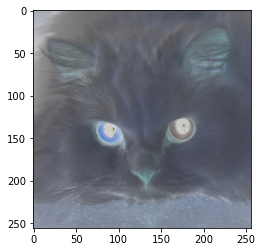

In [3]:
invimg = invert_img(img)
plt.imshow(invimg)

In [4]:
def grayscale_image(Image):
    weights=np.array([0.2989, 0.5870, 0.1140])
    arr = np.zeros((Image.shape[0], Image.shape[1], 3), dtype = int)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            arr[i][j][0] = int((Image[i][j][0] * weights[0]) + (Image[i][j][1] * weights[1]) + (Image[i][j][2] * weights[2]))
            arr[i][j][1] = int((Image[i][j][0] * weights[0]) + (Image[i][j][1] * weights[1]) + (Image[i][j][2] * weights[2]))
            arr[i][j][2] = int((Image[i][j][0] * weights[0]) + (Image[i][j][1] * weights[1]) + (Image[i][j][2] * weights[2]))
    return arr

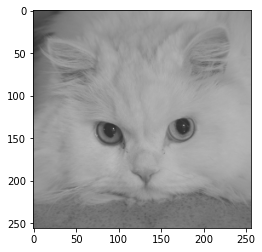

In [5]:
gimg = grayscale_image(img)
plt.imshow(gimg)

In [6]:
def boundary(Image, cutoff = 100):
    arr = np.zeros((Image.shape[0], Image.shape[1], 3), dtype = int)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            tmp = (int(Image[i][j][0] * 0.2989) + int(Image[i][j][1] * 0.5870) + int(Image[i][j][2] * 0.1140))
            if tmp >= cutoff:
                arr[i][j][0] = 255
                arr[i][j][1] = 255
                arr[i][j][2] = 255
            else:
                arr[i][j][0] = 0
                arr[i][j][1] = 0
                arr[i][j][2] = 0
    return arr

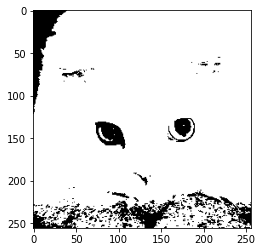

In [7]:
bimg = boundary(img, cutoff = 113)
plt.imshow(bimg)

In [8]:
def flip(Image, by):
    arr = np.zeros((Image.shape), dtype = int)
    if by == 'horizontal':
        for i in range(Image.shape[0]):
            for j in range(Image.shape[1]):
                arr[i][j] = Image[i][abs(j - 255)]
                arr[i][abs(j - 255)] = Image[i][j]
    elif by == 'vertical':
        for i in range(Image.shape[0]):
            for j in range(Image.shape[1]):
                arr[i][j] = Image[abs(i - 255)][j]
                arr[abs(i - 255)][j] = Image[i][j]
    return arr

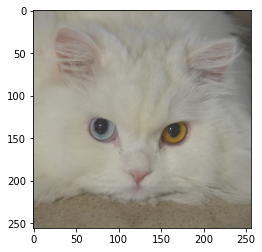

In [9]:
himg = flip(img, by = 'horizontal')
plt.imshow(himg)

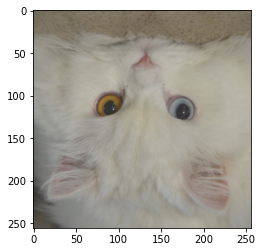

In [10]:
vimg = flip(img, by = 'vertical')
plt.imshow(vimg)

In [11]:
def padding(Image, padding_size, pad):
    if type(padding_size) == int or type(padding_size) == float:
        p = int(padding_size)
        arr = np.zeros(((Image.shape[0] + (2 * p)), (Image.shape[1] + (2 * p)), 3))
        for x in range(arr.shape[0]):
            for y in range(arr.shape[1]):
                for z in range(3):
                    arr[x][y][z] = pad
        for x in range(p , p + 256, 1):
            for y in range(p, p + 256, 1):
                for z in range(3):
                    arr[x][y][z] = (Image[x - p][y - p][z])
        
    elif type(padding_size) == tuple:
        p1 = int(padding_size[0])
        p2 = int(padding_size[1])
        arr = np.zeros(((Image.shape[0] + (2 * p1)), (Image.shape[1] + (2 * p2)), 3))
        for x in range(arr.shape[0]):
            for y in range(arr.shape[1]):
                for z in range(3):
                    arr[x][y][z] = pad
        for x in range(p1, p1 + 256, 1):
            for y in range(p2, p2 + 256, 1):
                for z in range(3):
                    arr[x][y][z] = (Image[x - p1][y - p2][z])
        for x in range(0, p1):
            for y in range(0, p2):
                for z in range(3):
                    arr[x][y][z] = pad
    arr = arr.astype("int")               
    return arr

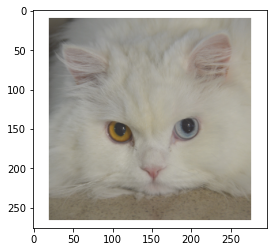

In [17]:
padimg = padding(img, padding_size = (10, 20), pad = 255)
plt.imshow(padimg)

In [13]:
def blur(Image, kernel_size, method = 'mean'):
    kernel = np.zeros((kernel_size, kernel_size, 3))
    arr = np.zeros((Image.shape))
    pad_blur = padding(Image, padding_size = kernel_size // 2, pad = 255)
    for t1 in range(kernel_size // 2):
        for t2 in range(kernel_size // 2):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[0][0][t3]
    for t1 in range(kernel_size // 2):
        for t2 in range(kernel_size // 2, (kernel_size // 2) + 256, 1):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[0][t2 - (kernel_size // 2)][t3];
    for t1 in range(kernel_size // 2):
        for t2 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2), 1):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[0][255][t3]
    for t1 in range(kernel_size // 2, (kernel_size // 2) + 256):
        for t2 in range(kernel_size // 2):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[t1 - (kernel_size // 2)][0][t3]
    for t1 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2), 1):
        for t2 in range(0, kernel_size // 2, 1):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[255][0][t3]
    for t1 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2), 1):
        for t2 in range(kernel_size // 2, 256 + (kernel_size // 2)):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[255][t2 - (kernel_size // 2)][t3]
    for t1 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2), 1):
        for t2 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2), 1):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[255][255][0]
    for t1 in range((kernel_size // 2), 256 + (kernel_size // 2)):
        for t2 in range(256 + (kernel_size // 2), 256 + ((kernel_size // 2) * 2)):
            for t3 in range(3):
                pad_blur[t1][t2][t3] = Image[t1 - (kernel_size // 2)][255][t3]
    if method == 'mean':
        for t4 in range(arr.shape[0]):
            for t5 in range(arr.shape[1]):
                val = np.zeros((3))
                for t1 in range(kernel_size):
                    for t2 in range(kernel_size):
                        for t3 in range(3):
                            kernel[t1][t2][t3] = pad_blur[t4 + t1][t5 + t2][t3]
                            val[t3] += kernel[t1][t2][t3]
                val = val / (kernel_size ** 2)
                val = val.astype("int")
                for t1 in range(3):
                    arr[t4][t5][t1] = val[t1]
    elif method == 'min':
        for t4 in range(arr.shape[0]):
            for t5 in range(arr.shape[1]):
                for t1 in range(kernel_size):
                    for t2 in range(kernel_size):
                        for t3 in range(3):
                            kernel[t1][t2][t3] = pad_blur[t4 + t1][t5 + t2][t3]
                val = kernel.min()
                for t1 in range(3):
                    arr[t4][t5][t1] = val
    elif method == 'max':
        for t4 in range(arr.shape[0]):
            for t5 in range(arr.shape[1]):
                for t1 in range(kernel_size):
                    for t2 in range(kernel_size):
                        for t3 in range(3):
                            kernel[t1][t2][t3] = pad_blur[t4 + t1][t5 + t2][t3]
                val = kernel.max()
                for t1 in range(3):
                    arr[t4][t5][t1] = val
    arr = arr.astype("int")
    arrr = grayscale_image(arr)
    return arrr

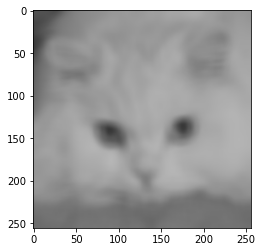

In [14]:
bimg = blur(img, kernel_size = 12, method = 'mean')
plt.imshow(bimg)